In [11]:
'''
Resolvendo um problema de regressão
'''

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error



In [8]:
# Carregue uma base de dados de regressão que NÃO esteja nos 
# toy datasets do scikit-learn;
# https://www.kaggle.com/ronitf/heart-disease-uci
base = pd.read_csv('heart.csv')
base.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [45]:
# Treine um modelo da classe LinearRegression 
# do scikit-learn com toda a base;

X, y = base.drop('target',axis=1), base.target
modelo = LinearRegression()
modelo.fit(X, y)
ypred = modelo.predict(X)
print(mean_squared_error(y, ypred))
print(modelo.intercept_)
print(modelo.coef_)

0.11965479756916172
0.8288986814219852
[-0.00082042 -0.19599555  0.11270339 -0.00199097 -0.00035354  0.01737364
  0.04984795  0.00301933 -0.14404593 -0.05878869  0.07897881 -0.10060216
 -0.11903917]


In [62]:
# Calcule o MSE (erro quadrático médio) para todos os exemplos da usada 
# como treino no modelo treinado;

for col in X.columns:
    X_col = np.array(X[col]).reshape(-1,1)
    modelo.fit(X_col, y)
    ypred = modelo.predict(X_col)
    print(f'Erro Quadrado Medio para {col}: {mean_squared_error(y, ypred):.2f}')


Erro Quadrado Medio para age: 0.24
Erro Quadrado Medio para sex: 0.23
Erro Quadrado Medio para cp: 0.20
Erro Quadrado Medio para trestbps: 0.24
Erro Quadrado Medio para chol: 0.25
Erro Quadrado Medio para fbs: 0.25
Erro Quadrado Medio para restecg: 0.24
Erro Quadrado Medio para thalach: 0.20
Erro Quadrado Medio para exang: 0.20
Erro Quadrado Medio para oldpeak: 0.20
Erro Quadrado Medio para slope: 0.22
Erro Quadrado Medio para ca: 0.21
Erro Quadrado Medio para thal: 0.22


In [134]:
# Plote em um gráfico (2D) o MSE em função do atributo intercept_ da 
# classe LinearRegression. Mantenha os valores do atributo coef_ fixos 
# e varie o valor de intercept_ entre intercept_ - delta e 
# intercept_ + delta. O gráfico tem que ser uma parábola com 
# concavidade para cima. 
# Não plote um gráfico 3D com visão de cima.



modelo.fit(X, y)
ypred = modelo.predict(X)
mse = mean_squared_error(y, ypred)
interc = modelo.intercept_

def plot_delta(intercept, erro):
    plt.plot(intercept, erro);
    plt.title('Heart Disease')
    plt.xlabel('Intercept')
    plt.ylabel('Erro Quadrado Médio')
    plt.show;


    


    

In [ ]:
# Coeficientes fixos 
coef_fixos = modelo.coef_[0]*X[X.columns[0]]+\
                    modelo.coef_[1]*X[X.columns[1]]+\
                    modelo.coef_[2]*X[X.columns[2]]+\
                    modelo.coef_[3]*X[X.columns[3]]+\
                    modelo.coef_[4]*X[X.columns[4]]+\
                    modelo.coef_[5]*X[X.columns[5]]+\
                    modelo.coef_[6]*X[X.columns[6]]+\
                    modelo.coef_[7]*X[X.columns[7]]+\
                    modelo.coef_[8]*X[X.columns[8]]+\
                    modelo.coef_[9]*X[X.columns[9]]+\
                    modelo.coef_[10]*X[X.columns[10]]+\
                    modelo.coef_[11]*X[X.columns[11]]+\
                    modelo.coef_[12]*X[X.columns[12]]

In [178]:
delta = np.random.uniform(0,1,1)
intercept = np.linspace(modelo.intercept_ - delta, 
                        modelo.intercept_ + delta, 
                        50)
erro = []
for i in range(len(intercept)):
    ypred1 = intercept[i] + coef_fixos
    erro.append(mean_squared_error(y, ypred1))
    
    

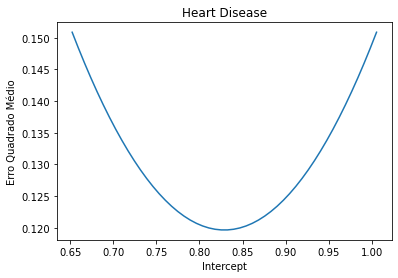

In [179]:
plot_delta(intercept, erro)